<a href="https://colab.research.google.com/github/aswa02/Email-Spam-Classifier/blob/main/Spam_Email.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import statements:


In [ ]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from collections import Counter
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

#Loading the data

In [ ]:
df=pd.read_csv('spam_dataset.csv', encoding = "ISO-8859-1")

In [ ]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [ ]:
df.tail()

,Unnamed: 0,label,text,label_num
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0
5170,4807,spam,Subject: important online banking alert\r\ndea...,1


In [ ]:
df.sample(5)

,Unnamed: 0,label,text,label_num
1152,3130,ham,"Subject: phone list\r\nin case you need it , t...",0
2599,5128,spam,"Subject: re : cira\r\nyael\r\nhastala vista ,\...",1
5071,1247,ham,"Subject: albert trevino 4 - 12 , tejas pipelin...",0
4296,3007,ham,"Subject: wellhead volumes\r\ndaren ,\r\nplease...",0
4384,4161,spam,Subject: \r\nthe only solution to penis enlarg...,1


#Data Cleaning:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [ ]:
df.drop(columns=['Unnamed: 0','label_num'],inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5171 non-null   object
 1   text    5171 non-null   object
dtypes: object(2)
memory usage: 80.9+ KB


In [ ]:
df.rename(columns={'label':'target'},inplace=True)

In [ ]:
df.sample(5)

,target,text
4497,ham,"Subject: re : nominations\r\nwe agree\r\n"" eil..."
4296,ham,"Subject: wellhead volumes\r\ndaren ,\r\nplease..."
3328,ham,"Subject: hpl noms for april 27 , 2001\r\n( see..."
2147,ham,"Subject: re : koch three rivers , # 6722\r\nai..."
4271,spam,Subject: alert : spam prevention\r\nr 3 mov 3\...


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [ ]:
df['target']=encoder.fit_transform(df['target'])

In [ ]:
df.sample(5)

,target,text
2615,0,Subject: fw : hpl imbalance payback\r\n- - - -...
1434,0,Subject: deals to be extended on meter 985097 ...
854,0,Subject: resume - marcia curry\r\njob posting ...
4742,0,Subject: unify stress test next week with syba...
2496,0,Subject: nom chnage - 7 / 8 / 2000 - eastrans\...


In [ ]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [ ]:
df.duplicated().sum()

178

In [ ]:
df.shape

(5171, 2)

In [ ]:
df=df.drop_duplicates()

In [ ]:
df.shape

(4993, 2)

In [ ]:
df['target'].value_counts()

0    3531
1    1462
Name: target, dtype: int64

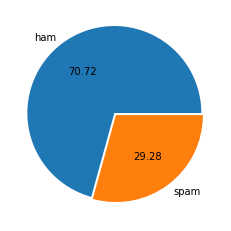

In [ ]:
import matplotlib.pyplot as plt
explode = [00.03,0]
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f',explode = explode)
plt.show()

In [ ]:
df['text'].apply(len)

0        327
1         97
2       2524
3        414
4        336
        ... 
5165     869
5166     534
5167    1114
5169     573
5170    1114
Name: text, Length: 4993, dtype: int64

#Data Preprocessing

In [ ]:
# Word Tokenization

In [ ]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
word_tokenize("Hye i am working")

['Hye', 'i', 'am', 'working']

In [ ]:
#punctuation or special character

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
#Stopwords

In [ ]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
#Stemming

In [ ]:
ps=PorterStemmer()
ps.stem('loving')

'love'

In [ ]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            if i.isalnum():
                y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [ ]:
df['transformed_text']=df['text'].apply(transform_text)

In [ ]:
df

,target,text,transformed_text
0,0,Subject: enron methanol ; meter # : 988291\r\n...,subject enron methanol meter 988291 follow not...
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",subject hpl nom januari 9 2001 see attach file...
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",subject neon retreat ho ho ho around wonder ti...
3,1,"Subject: photoshop , windows , office . cheap ...",subject photoshop window offic cheap main tren...
4,0,Subject: re : indian springs\r\nthis deal is t...,subject indian spring deal book teco pvr reven...
...,...,...,...
5165,0,"Subject: fw : crosstex energy , driscoll ranch...",subject fw crosstex energi driscol ranch 1 3 m...
5166,0,Subject: put the 10 on the ft\r\nthe transport...,subject put 10 ft transport volum decreas 2500...
5167,0,Subject: 3 / 4 / 2000 and following noms\r\nhp...,subject 3 4 2000 follow nom hpl take extra 15 ...
5169,0,Subject: industrial worksheets for august 2000...,subject industri worksheet august 2000 activ a...


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


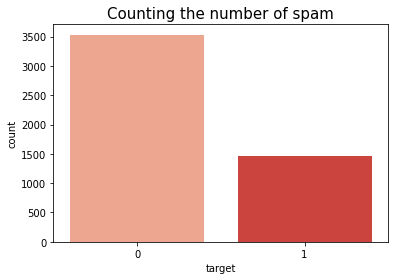

0    3531
1    1462
Name: target, dtype: int64


In [ ]:
#Graphical Visualisation for counting number of labels.
plt.figure(figsize=(6,4))
sns.countplot(df['target'],palette= 'Reds')
plt.title("Counting the number of spam",fontsize=15)
plt.xticks(rotation='horizontal')
plt.show()
print(df.target.value_counts())


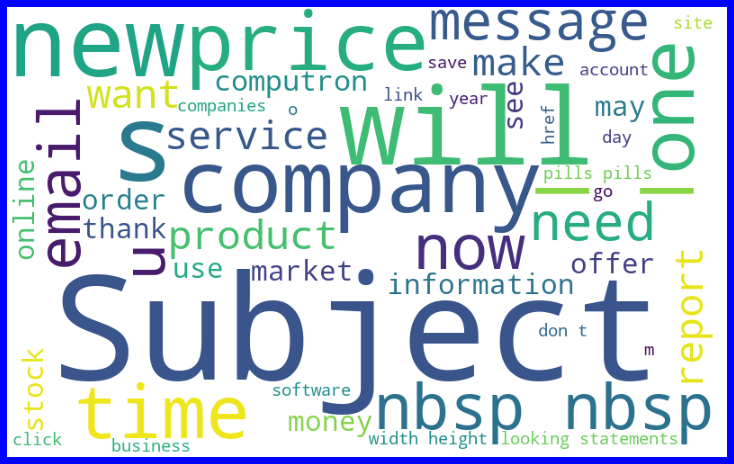

In [ ]:
#Getting sense of loud words in spam 
from wordcloud import WordCloud


spams = df['text'][df['target']==1]

spam_cloud = WordCloud(width=800,height=500,background_color='white',max_words=50).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='b')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

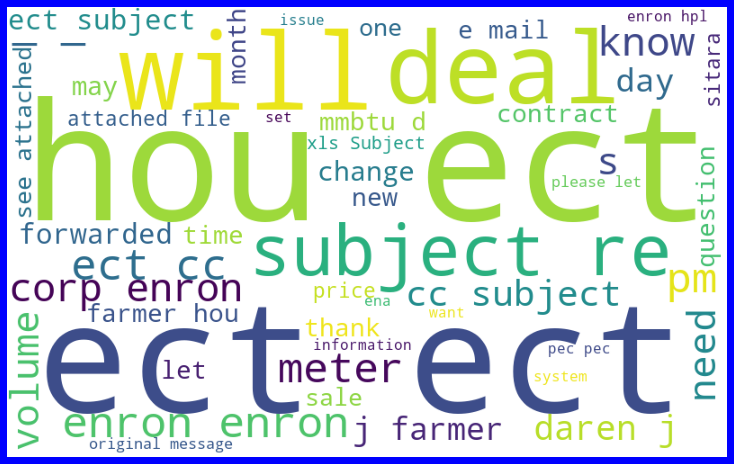

In [ ]:
#Getting sense of loud words in ham 
from wordcloud import WordCloud


spams = df['text'][df['target']==0]

spam_cloud = WordCloud(width=800,height=500,background_color='white',max_words=50).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='b')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#Model building

In [ ]:
#Vectorizng the mdoel to get the numerical representation of the text data:
cv=CountVectorizer()

In [ ]:
X=cv.fit_transform(df['transformed_text']).toarray()

In [ ]:
X.shape

(4993, 42592)

In [ ]:
y=df['target'].values


In [ ]:
y.shape

(4993,)

In [ ]:
#Train test split section:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
#Naive Bayes Alogorithm (best for text-targetted classifer)-->
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [ ]:
knc=KNeighborsClassifier()
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
gdbt=GradientBoostingClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs={
    'KNeighbors':knc,
    'GaussianNB':gnb,
    'MultinomialNB':mnb,
    'BernoulliNB':bnb,
    'DecisionTree':dtc,
    'LogisticReg':lrc,
    'RandomForest':rfc,
    'Adaboost':abc,
    'Bagging':bc,
    'GradientBoost':gdbt
}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [ ]:
train_classifier(rfc,X_train,y_train,X_test,y_test)

(0.972972972972973, 0.9508196721311475)

In [ ]:
acc=[]
precision=[]
print("Classifier_Name :\t: Accuracy :\t: Precision_Score")
for name,clf in clfs.items():
    curr_acc,curr_pre=train_classifier(clf,X_train,y_train,X_test,y_test)
    acc.append(curr_acc)
    precision.append(curr_pre)
    print(str(name)+"\t"+str(curr_acc)+'\t'+str(curr_pre))

Classifier_Name :	: Accuracy :	: Precision_Score
KNeighbors	0.8448448448448449	0.6666666666666666
GaussianNB	0.9519519519519519	0.950354609929078
MultinomialNB	0.970970970970971	0.9446254071661238
BernoulliNB	0.8468468468468469	0.8941798941798942
DecisionTree	0.8458458458458459	0.672093023255814
LogisticReg	0.963963963963964	0.9208860759493671
RandomForest	0.972972972972973	0.9508196721311475
Adaboost	0.938938938938939	0.8801261829652997
Bagging	0.948948948948949	0.9114754098360656
GradientBoost	0.9379379379379379	0.8726708074534162


In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':acc,'Precision':precision})

In [ ]:
performance_df 

,Algorithm,Accuracy,Precision
0,KNeighbors,0.844845,0.666667
1,GaussianNB,0.951952,0.950355
2,MultinomialNB,0.970971,0.944625
3,BernoulliNB,0.846847,0.894180
4,DecisionTree,0.845846,0.672093
5,LogisticReg,0.963964,0.920886
6,RandomForest,0.972973,0.950820
7,Adaboost,0.938939,0.880126
8,Bagging,0.948949,0.911475
9,GradientBoost,0.937938,0.872671
